In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
!ls "/content/gdrive/My Drive/Farand/Audio/AudioData"

destruction  drill  Noise  power50Hz  running  walking


In [ ]:
import os

parent_dir="/content/gdrive/My Drive/Farand/Audio/AudioData"
sub_dirs = os.listdir(parent_dir)
sub_dirs.sort()


In [ ]:
pip install librosa


In [ ]:
import librosa
audio_path = '/content/gdrive/My Drive/Farand/Audio/AudioData/drill/Sample_3_1.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050
librosa.load(audio_path, sr=None)


<class 'numpy.ndarray'> <class 'int'>


(array([-0.00079346,  0.00152588,  0.00286865, ..., -0.00289917,
        -0.00125122,  0.00039673], dtype=float32), 48000)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

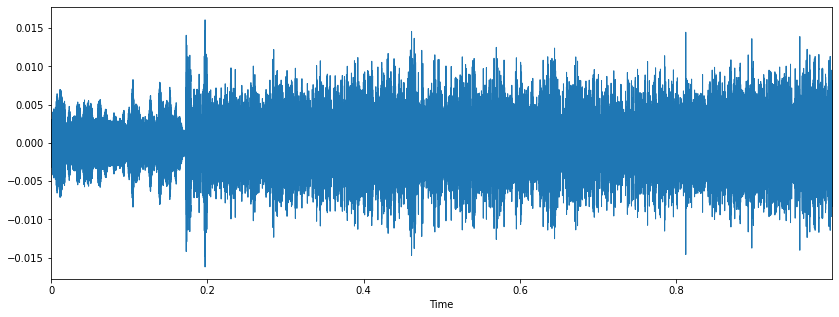

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

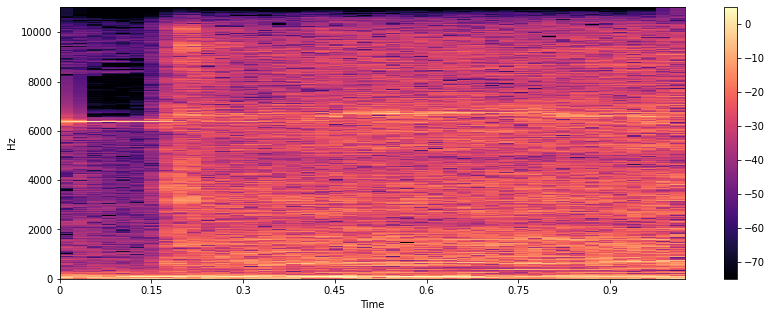

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

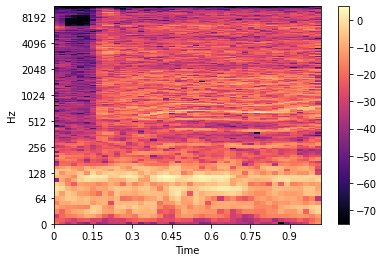

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

main code:
import all library


In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

convert the audio data files into PNG format images or basically extracting the Spectrogram for every Audio.[link text](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
AudioData = 'destruction  drill  power50Hz  running'.split()
for g in AudioData:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/gdrive/My Drive/Farand/Audio/AudioData/{g}'):
        songname = f'/content/gdrive/My Drive/Farand/Audio/AudioData/{g}/{filename}'
        y, sr = librosa.load(songname,sr=22050,mono=True,duration=1)
        plt.specgram(y, NFFT=256,Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

<function matplotlib.pyplot.clf>

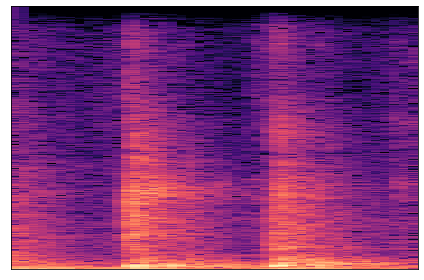

In [ ]:
D = librosa.stft(y)
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(D))
plt.tight_layout()
plt.savefig(f'img_data/{g}/{filename[:-3].replace(".","")}.png')
plt.clf

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
AudioData = 'destruction  drill  power50Hz  running'.split()
for g in AudioData:
    for filename in os.listdir(f'/content/gdrive/My Drive/Farand/Audio/AudioData/{g}'):
        songname = f'/content/gdrive/My Drive/Farand/Audio/AudioData/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=1)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
Audio_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(Audio_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)


Epoch 1/100
64/64 [==============================] - 0s 5ms/step - loss: 2.3983 - accuracy: 0.0000e+00
Epoch 2/100
64/64 [==============================] - 0s 80us/step - loss: 2.1306 - accuracy: 0.1719
Epoch 3/100
64/64 [==============================] - 0s 90us/step - loss: 1.9434 - accuracy: 0.4688
Epoch 4/100
64/64 [==============================] - 0s 50us/step - loss: 1.7652 - accuracy: 0.8438
Epoch 5/100
64/64 [==============================] - 0s 48us/step - loss: 1.5851 - accuracy: 0.9062
Epoch 6/100
64/64 [==============================] - 0s 44us/step - loss: 1.4200 - accuracy: 0.9375
Epoch 7/100
64/64 [==============================] - 0s 85us/step - loss: 1.2693 - accuracy: 0.9375
Epoch 8/100
64/64 [==============================] - 0s 65us/step - loss: 1.1256 - accuracy: 0.9375
Epoch 9/100
64/64 [==============================] - 0s 46us/step - loss: 0.9963 - accuracy: 0.9531
Epoch 10/100
64/64 [==============================] - 0s 54us/step - loss: 0.8794 - accuracy: 0.9

CNN Classification

In [ ]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD



In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
AudioData = 'destruction  drill  power50Hz  running'.split()
for g in AudioData:
    pathlib.Path(f'imgnew_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/gdrive/My Drive/Farand/Audio/AudioData/{g}'):
        songname = f'/content/gdrive/My Drive/Farand/Audio/AudioData/{g}/{filename}'
        y, sr = librosa.load(songname,mono=True,duration=1)
        plt.specgram(y, NFFT=512,Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'imgnew_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [ ]:
pip install split_folders


In [ ]:
import split_folders
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('./imgnew_data/', output="./data",ratio=(.8, .2)) # default values


Copying files: 80 files [00:00, 2167.07 files/s]


Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiz
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory(
        './data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_set = test_datagen.flow_from_directory(
        './data/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [ ]:
model = Sequential()
input_shape=(64, 64, 3)
#1st hidden layer
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#2nd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#Flatten
model.add(Flatten())
model.add(Dropout(rate=0.5))
#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
#Output layer
model.add(Dense(4))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d_4 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_7 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

In [ ]:
epochs = 200
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit_generator(
        training_set,
        steps_per_epoch=100,
        epochs=50,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/50
100/100 [==============================] - 87s 873ms/step - loss: 1.3673 - accuracy: 0.2931 - val_loss: 1.2943 - val_accuracy: 0.3750
Epoch 2/50
100/100 [==============================] - 87s 866ms/step - loss: 1.2139 - accuracy: 0.4684 - val_loss: 1.0657 - val_accuracy: 0.4375
Epoch 3/50
100/100 [==============================] - 87s 866ms/step - loss: 0.9708 - accuracy: 0.5766 - val_loss: 0.6923 - val_accuracy: 0.7500
Epoch 4/50
100/100 [==============================] - 86s 863ms/step - loss: 0.8084 - accuracy: 0.6347 - val_loss: 0.6847 - val_accuracy: 0.6875
Epoch 5/50
100/100 [==============================] - 86s 860ms/step - loss: 0.6758 - accuracy: 0.6856 - val_loss: 0.5346 - val_accuracy: 0.8125
Epoch 6/50
100/100 [==============================] - 86s 863ms/step - loss: 0.6250 - accuracy: 0.7050 - val_loss: 0.5466 - val_accuracy: 0.8125
Epoch 7/50
100/100 [==============================] - 87s 867ms/step - loss: 0.5841 - accuracy: 0.7306 - val_loss: 0.3926 - val_ac

In [ ]:
#Model Evaluation
model.evaluate_generator(generator=test_set, steps=50)


[0.05072900280356407, 1.0]

In [ ]:
test_set.reset()
pred = model.predict_generator(test_set, steps=50, verbose=1)



50/50 [==============================] - 10s 204ms/step


In [ ]:

predicted_class_indices=np.argmax(pred,axis=1)
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions = predictions[:15]
filenames=test_set.filenames
print(len(filename), len(predictions))



15 15


In [ ]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d_4 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_7 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

In [ ]:
score = model.evaluate(test_set, verbose=0)

print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 100.00%


In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session() 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()   
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

In [ ]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'}) 
model_file.SetContentFile('model.h5')
model_file.Upload()

NameError: ignored

In [ ]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')})

In [ ]:
file_obj = drive.CreateFile({'id': '16zbkEN4vqnPvIOvLMF1IaXKYCq5g3Yln'})
file_obj.GetContentFile('keras.h5')
